In [1]:

#Importing libraries
from scipy.io import arff
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from math import sqrt
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

In [2]:
# Input data 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/kidney-disease/kidney_disease.csv


In [3]:
file_path = '/kaggle/input/kidney-disease/kidney_disease.csv'

In [4]:
df = pd.read_csv(file_path)

In [5]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
df.shape

(400, 26)

In [7]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [8]:
# Renaming the column
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

Since packed_cell_volume,white_blood_cell_count, red_blood_cell_count are object even though they are numeric, need to force change 

In [10]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [12]:
## Seperate numeric and categoircal Values for further data preprocessing
num_cols = [col for col in df.columns if df[col].dtype != 'object']
cat_cols = df.columns.drop('class').drop(num_cols)
class_col = df['class']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [14]:

# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values



In [15]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'})

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})


In [16]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [17]:
print(df.isnull().sum())
df.isnull().sum().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64


1012

In [18]:
#replacing the missing values with the mean for the numerical features
num_cols = df.columns[df.dtypes=="float64"].tolist()
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

In [19]:
df.isnull().sum()

age                          0
blood_pressure               0
specific_gravity             0
albumin                      0
sugar                        0
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random         0
blood_urea                   0
serum_creatinine             0
sodium                       0
potassium                    0
haemoglobin                  0
packed_cell_volume           0
white_blood_cell_count       0
red_blood_cell_count         0
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [20]:
cat_cols = ['red_blood_cells','pus_cell','pus_cell_clumps','bacteria','hypertension',
        'diabetes_mellitus','coronary_artery_disease','appetite','peda_edema','aanemia','class']

In [21]:
#data encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for col in cat_cols:
    df[col]= label_encoder.fit_transform(df[col])

Now data elements are consistnet. Need to handle the missing values. For this we will deploy the DataFrameMapper and SimpleImputer from Sklearn package

In [22]:
imputer = KNNImputer(n_neighbors=3)
imputer.fit(df)

KNNImputer(n_neighbors=3)

In [23]:
data = imputer.transform(df)

In [24]:
df = pd.DataFrame(data, index=df.index, columns=df.columns)

In [25]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,1.262500,0.972500,0.125000,0.075000,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.377500,3.310000,0.095000,0.210000,0.195000,0.15500,0.375000
std,16.974966,13.476298,0.005369,1.272318,1.029487,0.655491,0.593823,0.360138,0.299331,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171,8.151081,2523.219976,0.840314,0.495588,0.591417,0.310186,0.413918,0.402965,0.36921,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000,0.000000,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.000000,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,64.000000,80.000000,1.020000,2.000000,0.450142,2.000000,1.000000,0.000000,0.000000,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000,1.000000,4.000000,0.000000,0.000000,0.000000,0.00000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,2.000000,5.000000,2.000000,2.000000,2.000000,2.00000,1.000000


In [26]:
#input split
X=df.drop(columns=["class"],axis=1)
y=df["class"]

In [27]:
X.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,48.0,80.0,1.020,1.0,0.0,2.0,1.0,0.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,1.0,4.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,2.0,1.0,0.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0.0,3.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,0.0,4.0,0.0,1.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1.0,3.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,0.0,3.0,0.0,0.0,0.0,0.0


In [28]:
# Splitting data into train and test datasetes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1024)

In [29]:
# Standardisation of data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [30]:
X_train[0]

array([0.64772727, 0.        , 0.25      , 0.6       , 0.        ,
       0.5       , 0.        , 0.        , 0.        , 0.40714286,
       0.46808511, 0.24318658, 0.16949153, 0.00451467, 0.44217687,
       0.48888889, 0.80838323, 0.28813559, 0.        , 0.8       ,
       0.        , 0.        , 1.        , 0.        ])

1)	Without applying any feature selection process
2)	With applying decision trees 
3)	Filter methods
4)	Wrapper methods
5)	Embedded methods


 Without applying any feature selection process 

In [31]:
# Grid Search for KNN

hyperparameters = {
    'leaf_size' : list(range(1,30)),
    'n_neighbors' : list(range(1,25)),
    'p' : [1,2]
}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(estimator=knn, param_grid=hyperparameters, cv=10, n_jobs=-1)

knn_cv.fit(X_train, y_train)

knn_cv.best_params_

{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}

In [32]:
knn = KNeighborsClassifier(leaf_size=1, p=1, n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=6, p=1)

In [33]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.94        74
         1.0       0.87      0.98      0.92        46

    accuracy                           0.93       120
   macro avg       0.93      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120



SVM

In [34]:
 # Grid Search for SVM

hyperparameters = {
    'C': [1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['linear', 'poly', 'sigmoid', 'rbf']}

svm = SVC()

svm_cv = GridSearchCV(estimator=svm, param_grid=hyperparameters, cv=10, n_jobs=-1)

svm_cv.fit(X_train, y_train)

svm_cv.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}

In [35]:
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(X_train, y_train)

SVC(C=10, gamma=0.1)

In [36]:
y_pred_svc = svm.predict(X_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        74
         1.0       0.98      0.98      0.98        46

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



Naive Bayes

In [37]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
y_pred_NB = naive_bayes.predict(X_test)
print(classification_report(y_pred_NB, y_test))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92        67
         1.0       0.96      0.83      0.89        53

    accuracy                           0.91       120
   macro avg       0.92      0.90      0.91       120
weighted avg       0.91      0.91      0.91       120



In [38]:
#Defining precison score for each model
ps_svm=precision_score(y_test, y_pred_svc)
ps_knn=precision_score(y_test, y_pred_knn)
ps_nb=precision_score(y_test, y_pred_NB)

precision_score_List=[ps_svm,ps_knn,ps_nb]
#Defining recall for each model
recall_svm=recall_score(y_test, y_pred_svc)
recall_knn=recall_score(y_test, y_pred_knn)
recall_nb=recall_score(y_test, y_pred_NB)

recall_List=[recall_svm,recall_knn,recall_nb]
#Defining recall for each model
f1_score_svm=f1_score(y_pred_svc, y_pred_svc)
f1_score_knn=f1_score(y_pred_knn, y_pred_knn)
f1_score_nb=f1_score(y_test,y_pred_NB)

f1_score_List=[f1_score_svm,f1_score_knn,f1_score_nb]

In [39]:
Algorithm_Name_List=["SVM","KNN","Naive Bayes"]
metrics_List=["precison score","recall","f1-score"]

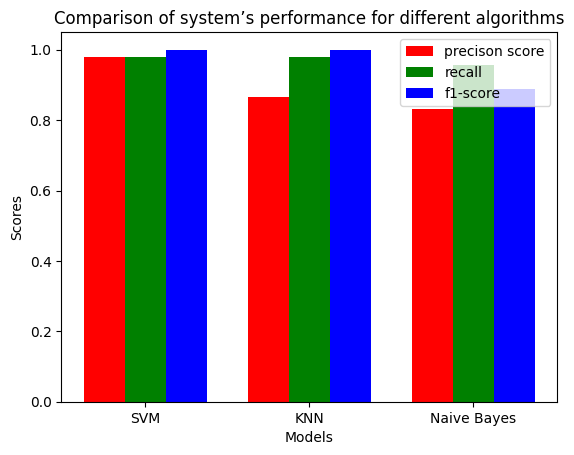

In [40]:
N = 3
ind = np.arange(N)
width = 0.25


bar1 = plt.bar(ind, precision_score_List, width, color = 'r')


bar2 = plt.bar(ind+width, recall_List, width, color='g')


bar3 = plt.bar(ind+width*2, f1_score_List, width, color = 'b')


plt.xlabel("Models")
plt.ylabel('Scores')
plt.title("Comparison of system’s performance for different algorithms")

plt.xticks(ind+width,Algorithm_Name_List)
plt.legend( (bar1, bar2, bar3), (metrics_List) )
plt.show()

In [41]:
# I keep a copy of the dataset with all the variables
# to compare the performance of machine learning models
# at the end of the notebook

X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [42]:
X_train[0]

array([0.64772727, 0.        , 0.25      , 0.6       , 0.        ,
       0.5       , 0.        , 0.        , 0.        , 0.40714286,
       0.46808511, 0.24318658, 0.16949153, 0.00451467, 0.44217687,
       0.48888889, 0.80838323, 0.28813559, 0.        , 0.8       ,
       0.        , 0.        , 1.        , 0.        ])

In [43]:
#train linear model with L1 penalty
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [44]:
x_train, x_devel, y_train, y_devel= train_test_split(X, y, test_size= 0.33, random_state= 20)

In [45]:
lsvc= LinearSVC(C= 1.0, penalty= 'l1', dual= False).fit(x_train, y_train)
svc_mod= SelectFromModel(lsvc, prefit= True)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [46]:
#get non-zeroed features 
x_train_svc= svc_mod.transform(x_train) #training set w/non-zeroed features
selected_feats_svc= pd.DataFrame(svc_mod.inverse_transform(x_train_svc), index= x_train.index, columns= x_train.columns)
selected_cols_svc= selected_feats_svc.columns[selected_feats_svc.var() != 0]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [47]:

#get development set that has only the non-zeroed features
x_devel_svc= x_devel[selected_cols_svc]

#see which features were retained
print('Features retained: ', selected_cols_svc)

Features retained:  Index(['blood_pressure', 'albumin', 'sugar', 'red_blood_cells',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'appetite', 'peda_edema'],
      dtype='object')


In [48]:
from sklearn.feature_selection import SelectKBest, f_classif
kbest_feats= SelectKBest(f_classif, k=10)

#get top 5 best features
x_train_kbest= kbest_feats.fit_transform(x_train, y_train)
selected_feats_kbest= pd.DataFrame(kbest_feats.inverse_transform(x_train_kbest), index= x_train.index, columns= x_train.columns)
selected_cols_kbest= selected_feats_kbest.columns[selected_feats_kbest.var() != 0]

#get development set that has the top 5 features
x_devel_kbest= x_devel[selected_cols_kbest]

#see which features were retained
print('Features retained: ', selected_cols_kbest)

Features retained:  Index(['specific_gravity', 'albumin', 'blood_glucose_random', 'blood_urea',
       'serum_creatinine', 'sodium', 'haemoglobin', 'packed_cell_volume',
       'red_blood_cell_count', 'hypertension'],
      dtype='object')


In [49]:
from sklearn.ensemble import RandomForestClassifier

#create and train a random forest
forest= RandomForestClassifier(n_estimators= 1000, random_state= 20)
forest.fit(x_train, y_train)

#get the most important features
forest_feats= SelectFromModel(forest, threshold= 'median')
forest_feats.fit(x_train, y_train)

#get training and development sets that have only the most important features
x_train_forest= forest_feats.transform(x_train)
x_devel_forest= forest_feats.transform(x_devel)

#see which features were retained
for i in forest_feats.get_support(indices= True):
    print(x_train.columns[i])

specific_gravity
albumin
red_blood_cells
blood_glucose_random
blood_urea
serum_creatinine
sodium
haemoglobin
packed_cell_volume
red_blood_cell_count
hypertension
diabetes_mellitus


In [50]:
from sklearn.ensemble import RandomForestClassifier

#create and train a random forest
forest= RandomForestClassifier(n_estimators= 1000, random_state= 20)
forest.fit(x_train, y_train)

#get the most important features
forest_feats= SelectFromModel(forest, threshold= 'median')
forest_feats.fit(x_train, y_train)

#get training and development sets that have only the most important features
x_train_forest= forest_feats.transform(x_train)
x_devel_forest= forest_feats.transform(x_devel)

#see which features were retained
for i in forest_feats.get_support(indices= True):
    print(x_train.columns[i])

specific_gravity
albumin
red_blood_cells
blood_glucose_random
blood_urea
serum_creatinine
sodium
haemoglobin
packed_cell_volume
red_blood_cell_count
hypertension
diabetes_mellitus
